In [2]:
SOI_data = !ls /cassini_ringsdata/SOI/*.cub

In [3]:
SOI_data

['/cassini_ringsdata/SOI/N1467345444_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345503_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345562_3.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345621_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345680_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345739_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345798_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345857_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345916_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467345975_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346034_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346093_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346152_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346211_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346270_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346329_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N1467346388_2.map.dst.cal.cub',
 '/cassini_ringsdata/SOI/N14673

In [4]:
from pyciss import io

In [5]:
%matplotlib nbagg

In [6]:
from IPython.html.widgets import interact

In [7]:
def get_cube(i=0):
    return io.RingCube.open(SOI_data[i])

In [111]:
def show_cube(i=0):
    cube = io.RingCube.open(SOI_data[i])
    cube.imshow(interpolation='none')

/usr/local/python/miniconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


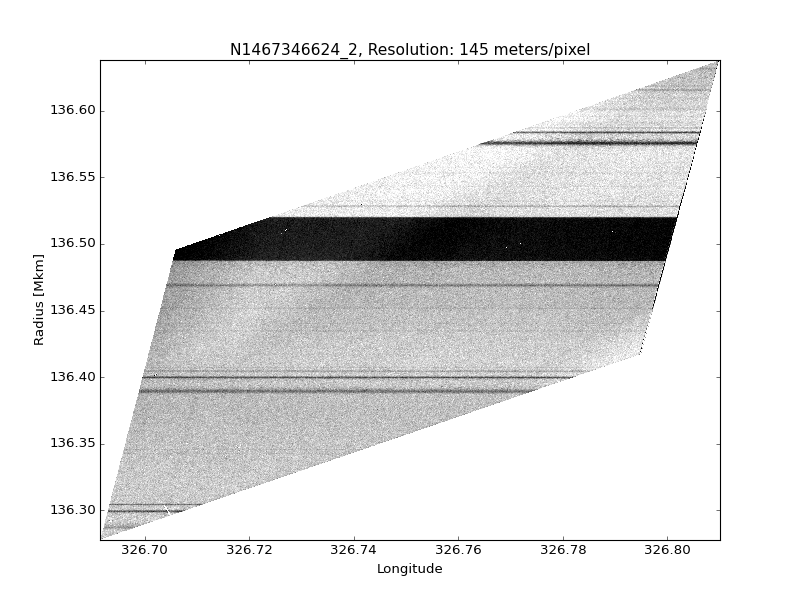

In [112]:
interact(show_cube, i=(0,len(SOI_data),1))

In [125]:
cube = get_cube(20)

In [172]:
plt.close('all')

In [127]:
cube.img.shape

(2479, 1944)

<IPython.core.display.Javascript object>


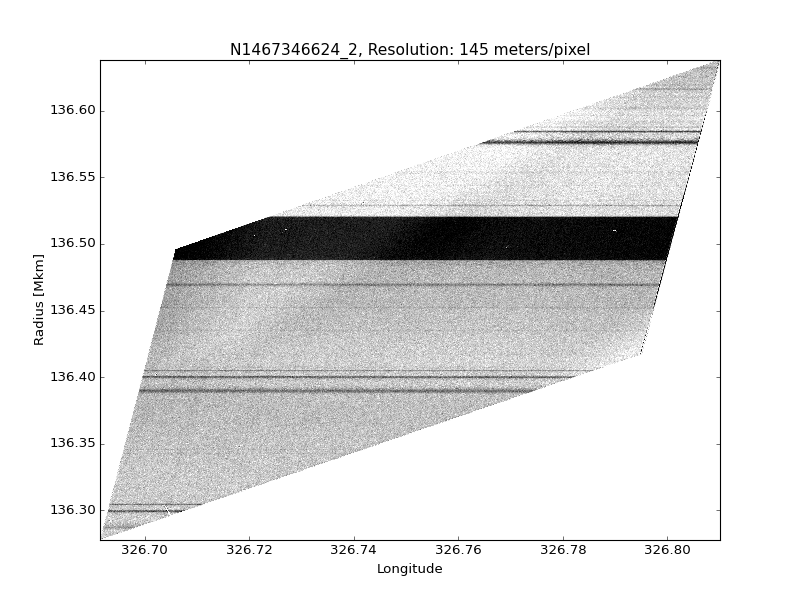

In [135]:
cube.imshow()

<IPython.core.display.Javascript object>


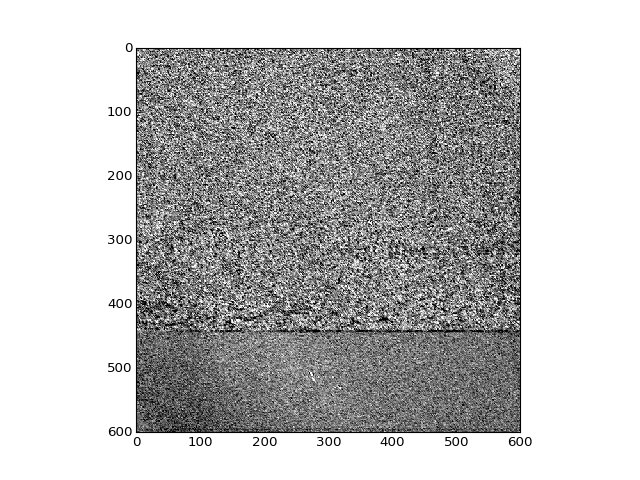

/usr/local/python/miniconda/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [213]:
plt.figure()
data = cube.density_wave_subtracted[1000:1600, 1000:1600]
# data = cube.img[1000:1600, 1000:1600]
plow, phigh = np.percentile(data, (2,98))
plt.imshow(data, interpolation='none', cmap='gray', vmin=plow, vmax=phigh)

<IPython.core.display.Javascript object>


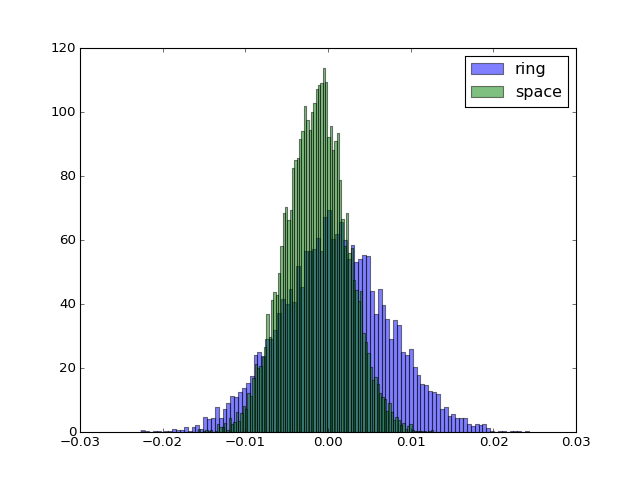

In [191]:
plt.figure()
myarray = data[100:200, 300:400].ravel() 
plt.hist(myarray, 100, normed=True, label='ring',
         alpha=0.5)
plt.hist(data[480:580:, 400:500].ravel(), 100, normed=True, label='space',
         alpha=0.5)
plt.legend()

In [209]:
plt.close('all')

In [164]:
from scipy.ndimage.morphology import grey_opening, grey_closing, grey_erosion

In [214]:
result2 = grey_opening(data, size=2)
result3 = grey_opening(data, size=3)
result4 = grey_opening(data, size=4)

<IPython.core.display.Javascript object>


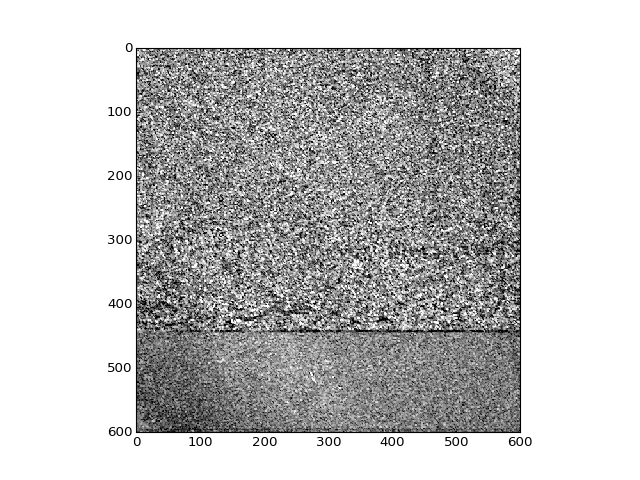

<IPython.core.display.Javascript object>


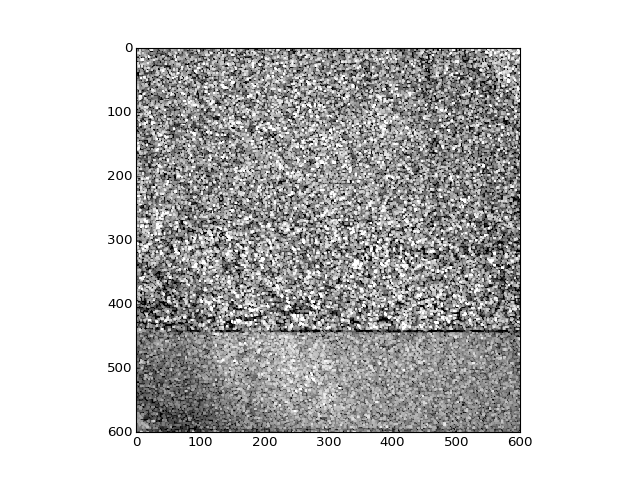

<IPython.core.display.Javascript object>


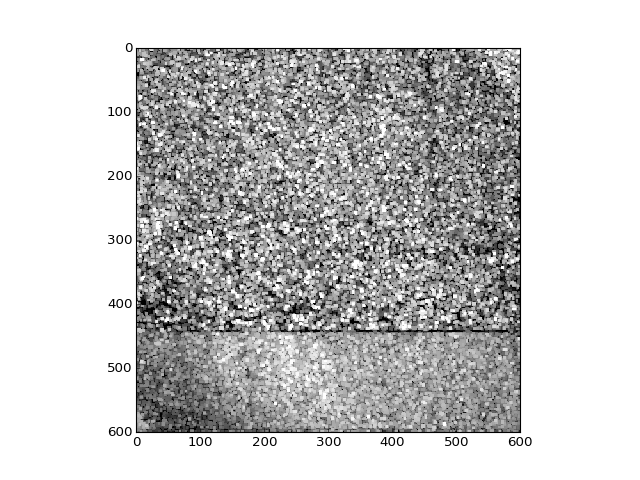

In [215]:
plt.figure()
plow, phigh = np.percentile(result2, (2,98))
plt.imshow(result2, interpolation='none', cmap='gray', vmin=plow, vmax=phigh)
plt.figure()
plow, phigh = np.percentile(result3, (2,98))
plt.imshow(result3, interpolation='none', cmap='gray', vmin=plow, vmax=phigh)
plt.figure()
plow, phigh = np.percentile(result4, (2,98))
plt.imshow(result4, interpolation='none', cmap='gray', vmin=plow, vmax=phigh)

<IPython.core.display.Javascript object>


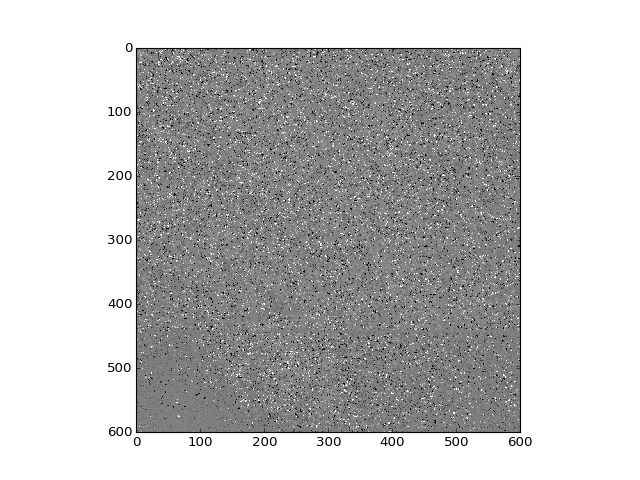

In [224]:
divided = data / result2
plt.figure()
plow, phigh = np.percentile(divided, (2,98))
plt.imshow(divided, interpolation='none', cmap='gray', vmin=plow, vmax=phigh)

In [80]:
from pysis.isis import crop, uncrop

In [106]:
cube_nomap = io.RingCube.open('/cassini_ringsdata/opus/N1467345680/N1467345680_2.dst.cal.cub')

In [81]:
cd /cassini_ringsdata/opus/N1467345680/

/cassini_ringsdata/opus/N1467345680


In [107]:
newcube = io.RingCube.open('mapped.cub')

In [ ]:
newcube.imshow(interpolation='none')

In [85]:
crop(from_='N1467345680_2.dst.cal.cub',
     to='cropped.cub', sample=1, line=1, nsamples=100, nlines=100)

b'Group = Results\n  InputLines      = 1024\n  InputSamples    = 1024\n  StartingLine    = 1\n  StartingSample  = 1\n  EndingLine      = 100\n  EndingSample    = 100\n  LineIncrement   = 1\n  SampleIncrement = 1\n  OutputLines     = 100\n  OutputSamples   = 100\nEnd_Group\n'

<IPython.core.display.Javascript object>


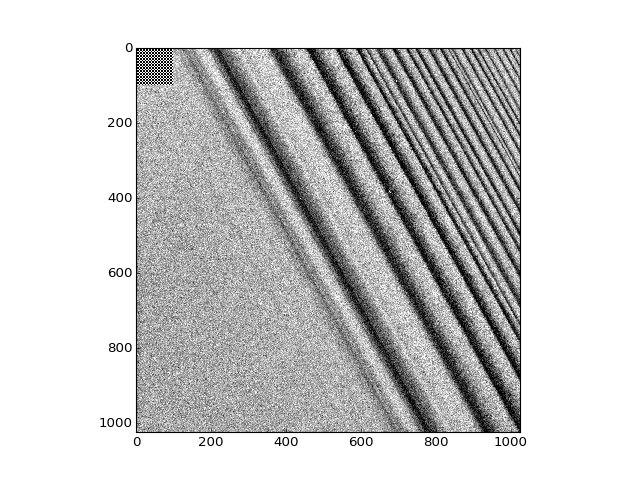

In [94]:
plt.figure()
plow, phigh = np.percentile(cube_nomap.img, (2,98))
plt.imshow(cube_nomap.img, cmap='gray', vmin=plow, vmax=phigh, interpolation='none')

In [95]:
l = 50* [0,0.1]
l2 = 50* [0.1,0]

In [96]:
double_line = np.vstack((np.array(l),np.array(l2)))

In [97]:
pepper_salt = np.tile(double_line.T, 50)

<IPython.core.display.Javascript object>


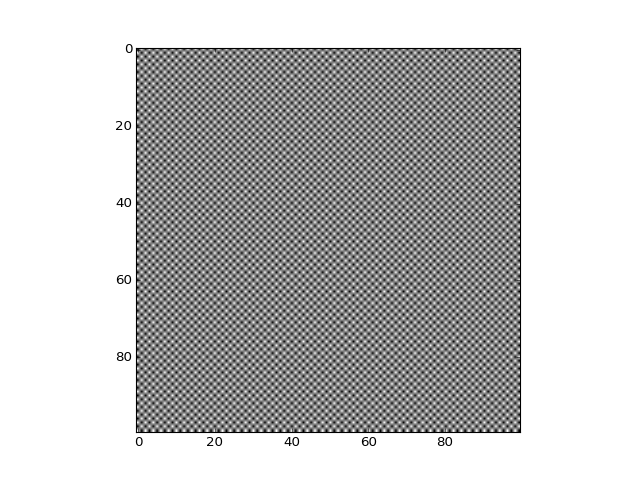

In [98]:
plt.figure()
plt.imshow(pepper_salt, cmap='gray')

In [99]:
np.savetxt('pepper_salt', pepper_salt, delimiter=',')

In [100]:
from pysis.isis import ascii2isis

In [101]:
ascii2isis(from_='pepper_salt', to='pepper_salt.cub', samples=100, lines=100)

b''

In [104]:
ll

total 54135
-rwx------. 1 klay6683    4292330 Jun  9 04:36 backup_copy.dst.cal.cub*
-rwx------. 1 klay6683     138589 Jun  9 04:19 cropped.cub*
-rwx------. 1 klay6683   21179345 Jun  9 04:40 mapped.cub*
-rwx------. 1 1453592717  4291580 Jun  8 13:04 N1467345680_2.cal.cub*
-rwx------. 1 1453592717  2195416 Jun  8 13:04 N1467345680_2.cub*
-rwx------. 1 klay6683    4292330 Jun  9 04:36 N1467345680_2.dst.cal.cub*
-rwx------. 1 klay6683    1414456 Jun  8 11:28 N1467345680_2_Filtered.png*
-rwx------. 1 1453592717  2127944 Jun  3 15:19 N1467345680_2.IMG*
-rwx------. 1 1453592717     3628 Jun  3 15:19 N1467345680_2.LBL*
-rwx------. 1 1453592717 21178884 Jun  3 15:19 N1467345680_2.map.cal.cub*
-rwx------. 1 1453592717      124 Jun  3 15:19 N1467345680_2.map.cal.pgw*
-rwx------. 1 klay6683   21179469 Jun  8 12:06 N1467345680_2.map.dst.cal.cub*
-rwx------. 1 klay6683        124 Jun  8 14:07 N1467345680_2.map.dst.cal.pgw*
-rwx------. 1 klay6683    5012713 Jun  8 14:07 N1467345680_2.map.dst.cal.png

In [105]:
pwd

'/cassini_ringsdata/opus/N1467345680'